# Inspection of concrete structures



In [2]:
%matplotlib inline
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np
import os

def get_preprocessed_images(images_directory: str, image_size: tuple) -> list:
    stop=200
    images = []
    for img in os.listdir(images_directory):
        img = image.load_img(images_directory+img, target_size=image_size)
        img = image.img_to_array(img)
        img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
        img = preprocess_input(img)
        images.append(img)

        if stop == 0:
            break
        stop-=1
        print(stop)
    return np.vstack(images)

In [3]:
# Import the keras preprocessing method.
from tensorflow.keras.preprocessing import image
image_size = (1024, 1024)
# Load your images and preprocess them.
cracks_images = get_preprocessed_images("C:/Users/bmadmin/Desktop/Octocat/mohammedbouazzaoui/concrete_inspection_dataset/SDNET2018/X/CX/", image_size)
non_cracks_images = get_preprocessed_images("C:/Users/bmadmin/Desktop/Octocat/mohammedbouazzaoui/concrete_inspection_dataset/SDNET2018/X/UX/", image_size)

# Make a numpy array for each of the class labels (one hot encoded).
cracks_labels = np.tile([1, 0], (cracks_images.shape[0], 1))
non_cracks_labels = np.tile([0, 1], ( non_cracks_images.shape[0], 1))

# Concatenate your images and your labels into X and y.
X = np.concatenate([cracks_images,  non_cracks_images])
X = np.concatenate([cracks_images])
y = np.concatenate([cracks_labels,  non_cracks_labels])

print(X.shape, y.shape)

199
198
197
196
195
194
193
192
191
190
189
188
187
186
185
184
183
182
181
180
179
178
177
176
175
174
173
172
171
170
169
168
167
166
165
164
163
162
161
160
159
158
157
156
155
154
153
152
151
150
149
148
147
146
145
144
143
142
141
140
139
138
137
136
135
134
133
132
131
130
129
128
127
126
125
124
123
122
121
120
119
118
117
116
115
114
113
112
111
110
109
108
107
106
105
104
103
102
101
100
99
98
97
96
95
94
93
92
91
90
89
88
87
86
85
84
83
82
81
80
79
78
77
76
75
74
73
72
71
70
69
68
67
66
65
64
63
62
61
60
59
58
57
56
55
54
53
52
51
50
49
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
199
198
197
196
195
194
193
192
191
190
189
188
187
186
185
184
183
182
181
180
179
178
177
176
175
174
173
172
171
170
169
168
167
166
165
164
163
162
161
160
159
158
157
156
155
154
153
152
151
150
149
148
147
146
145
144
143
142
141
140
139
138
137
136
135
134
133
132
131
130
129
128
127
126
125
124
123
12

In [4]:
#TESTING
# Display one image
from matplotlib import pyplot as plt
def display_one(img, title1 = "Original", isGray=False):
    if isGray:
        img = cv2.cvtColor(edited_image, cv2.COLOR_BGR2GRAY)
        plt.imshow(img, cmap="gray")
    else:
        plt.imshow(img)

    plt.title(title1)
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [5]:
# Display two images
def display_two(original_img, edited_img, title1 = "Original", title2 = "Edited", isGray=False):
    plt.figure(figsize=(18,13))
    
    plt.subplot(121)
    if isGray:
        img=image.array_to_img(original_img)
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        plt.imshow(img, cmap="gray") 
    else:
        img=image.array_to_img(original_img)
        plt.imshow(img)
    plt.title(title1), plt.xticks([]), plt.yticks([])
    
    plt.subplot(122)
    
    if isGray:
        
        #edited_img = cv2.cvtColor(edited_img, cv2.COLOR_BGR2GRAY)
        plt.imshow(edited_img, cmap="gray")
    else:
        print("no grey")
        plt.imshow(edited_img)
    plt.title(title2), plt.xticks([]), plt.yticks([])


    plt.show()

In [6]:
IMAGEPOINT=6

12


<Figure size 720x720 with 0 Axes>

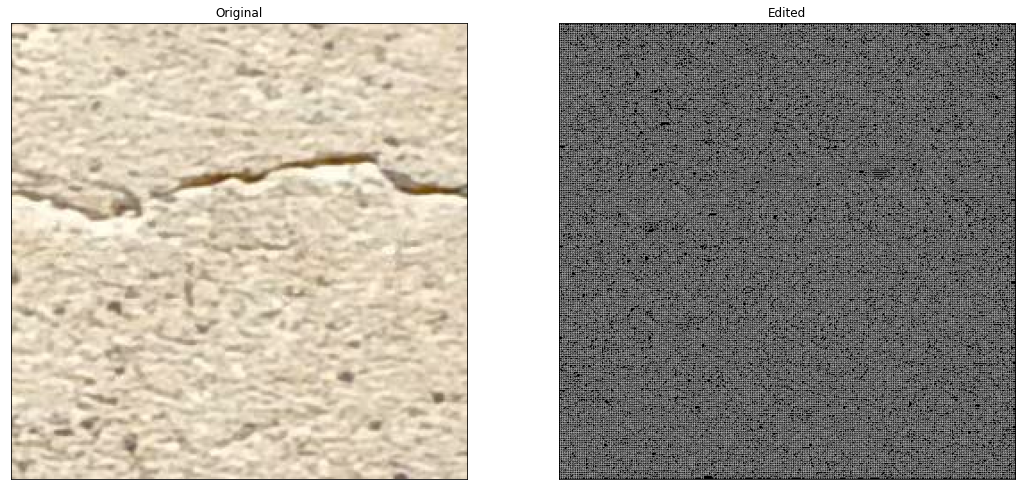

In [36]:

# Resize the image using the cv2.resize() method and linear interpolation
import cv2
import numpy as np
height = 1024
width = height
#IMAGEPOINT=99

#for i in range(200):
print(IMAGEPOINT)
original_image_array1 = X[IMAGEPOINT] ### FILL IN ###
original_image_array = cv2.cvtColor(original_image_array1, cv2.COLOR_BGR2GRAY)

edited_image = cv2.resize(original_image_array, (width,height),interpolation=cv2.INTER_LINEAR)

t_lower = 0 # Lower Threshold
t_upper = 250 # Upper threshold
edited_image=(edited_image*255).astype(np.uint8) 
edited_image = cv2.Canny(edited_image, t_lower, t_upper)
plt.figure(figsize=(10,10))

 

#plt.imshow(dd, cmap="gray") 
display_two(original_image_array1, edited_image, title1 = "Original", title2 = "Edited", isGray=True)
IMAGEPOINT+=1

11
[[[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 0]
  [1 1 0]
  [1 1 0]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 0]
  [1 1 0]
  [1 1 0]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 0]
  [1 1 0]
  [1 1 0]]

 ...

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[1 1 0]
  [1 1 0]
  [1 1 0]
  ...
  [1 0 0]
  [1 0 0]
  [1 0 0]]

 [[1 1 0]
  [1 1 0]
  [1 1 0]
  ...
  [1 0 0]
  [1 0 0]
  [1 0 0]]]


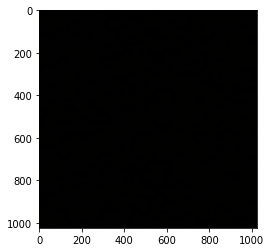

In [35]:
original_image_array = X[IMAGEPOINT-1]
img=image.array_to_img(original_image_array)

print(IMAGEPOINT-1)

def unsharp_mask(image, kernel_size=(5, 5), sigma=1.0, amount=1.0, threshold=0):
    """Return a sharpened version of the image, using an unsharp mask.
    
    Taken from https://stackoverflow.com/a/55590133
    """
    blurred = cv2.GaussianBlur(image, kernel_size, sigma)
    sharpened = float(amount + 1) * image - float(amount) * blurred
    sharpened = np.maximum(sharpened, np.zeros(sharpened.shape))
    sharpened = np.minimum(sharpened, 255 * np.ones(sharpened.shape))
    sharpened = sharpened.round().astype(np.uint8)
    if threshold > 0:
        low_contrast_mask = np.absolute(image - blurred) < threshold
        np.copyto(sharpened, image, where=low_contrast_mask)
    return sharpened

edited_image = unsharp_mask(edited_image, amount=1.0)
#display_two(original_image, edited_image)
plt.imshow(edited_image)
print(edited_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


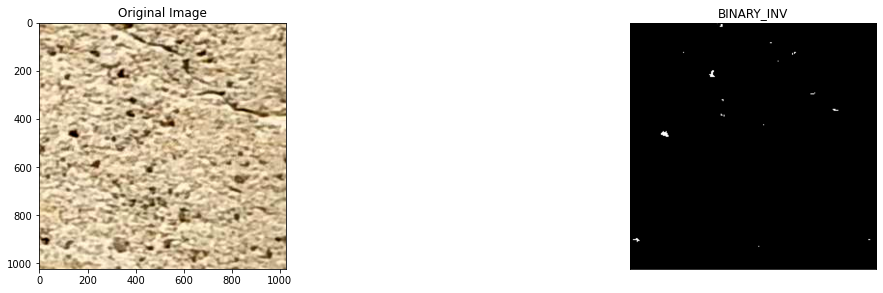

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(1024, 1024, 3)

In [24]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

#IMAGEPOINT=7
original_image = X[IMAGEPOINT-1] ### FILL IN ###
# WARNING: openCV works with the BGR(blue, green, red) color map, whereas pyplot works with RGB

#img=original_image
#We can additionally convert it to grayscale
img_GRAYSCALE =  cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
img=img_GRAYSCALE

#img=original_image
ret,thresh1 = cv.threshold(img,0,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,0,255,cv.THRESH_BINARY_INV)
#ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
#ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
#ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
#images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize=(15,15))
'''
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
'''
plt.subplot(2,3,1),plt.imshow(original_image,'gray',vmin=0,vmax=255)
plt.title(titles[0])
#plt.subplot(2,3,2),plt.imshow(thresh1,'gray',vmin=0,vmax=255)
#plt.title(titles[1])
plt.subplot(2,3,3),plt.imshow(thresh2,'gray',vmin=0,vmax=255)
plt.title(titles[2])
plt.xticks([]),plt.yticks([])
plt.show()
print(thresh2)
original_image.shape

In [26]:
# Python program to demonstrate erosion and
# dilation of images.
import cv2
import numpy as np
 
# Reading the input image
img = thresh2
 
# Taking a matrix of size 5 as the kernel
kernel = np.ones((1,1), np.uint8)
 
# The first parameter is the original image,
# kernel is the matrix with which image is
# convolved and third parameter is the number
# of iterations, which will determine how much
# you want to erode/dilate a given image.
img_erosion = cv2.erode(img, kernel, iterations=1)
img_dilation = cv2.dilate(img, kernel, iterations=1)
 
#cv2.imshow('Input', img)
#cv2.imshow('Erosion', img_erosion)
#cv2.imshow('Dilation', img_dilation)
 
#cv2.waitKey(0)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


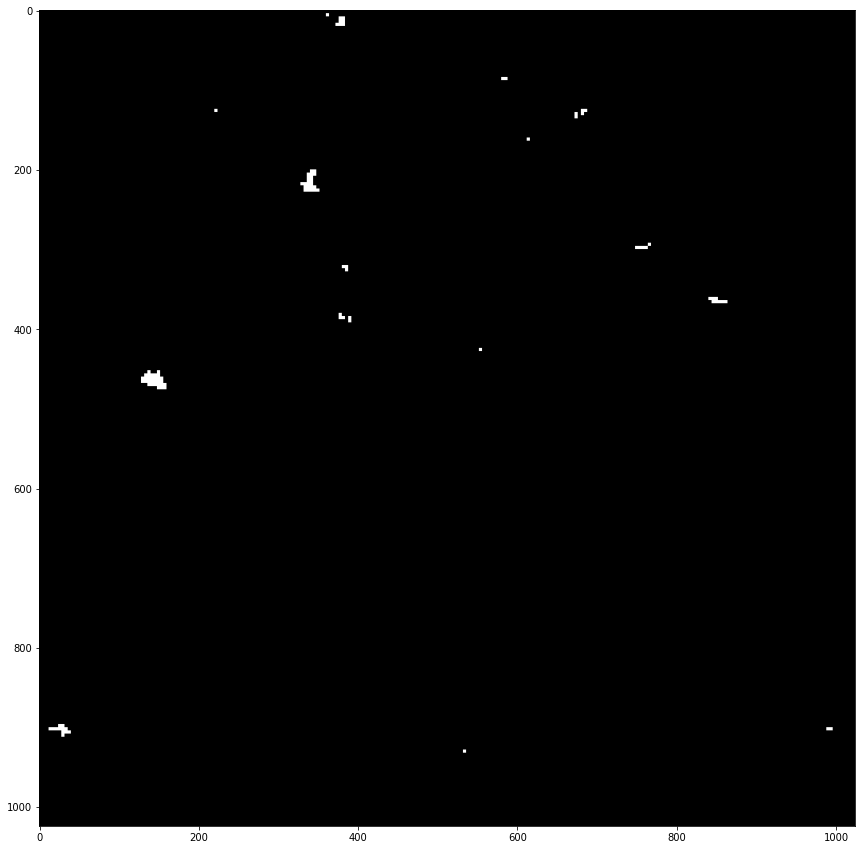

In [27]:
# Taking a matrix of size 5 as the kernel
kernel = np.ones((3,3), np.uint8)
img = thresh2
plt.figure(figsize=(15,15))
img=(img*255).astype(np.uint8) 
#img = cv2.erode(img, kernel, iterations=1)
#img = cv2.dilate(img, kernel, iterations=1)
plt.imshow(img,'gray')
#print(sum(img))
print(img)

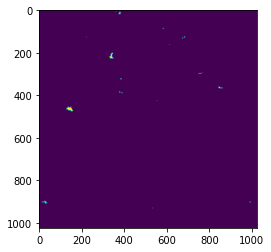

In [28]:
 
plt.imshow(img_dilation)
img_erosion = cv2.erode(img_dilation, kernel, iterations=1)
plt.imshow(img_erosion)

In [16]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, 
    y,
    test_size=0.2, 
    random_state=42, 
    shuffle=True
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, 
    y_train_val,
    test_size=0.2, 
    random_state=42, 
    shuffle=True
)

In [17]:
from keras.preprocessing.image import ImageDataGenerator

# Determine the number of generated samples you want per original sample.
datagen_batch_size = 16

# Make a datagenerator object using ImageDataGenerator.
train_datagen = ImageDataGenerator(rotation_range=60,
                                    horizontal_flip=True)

# Feed the generator your train data.
train_generator = train_datagen.flow(X_train, y_train, batch_size=datagen_batch_size)

# Make a datagenerator object using ImageDataGenerator.
validation_datagen = ImageDataGenerator(rotation_range=60,
                                        horizontal_flip=True)

# Feed the generator your validation data.
validation_generator = validation_datagen.flow(X_val, y_val, batch_size=datagen_batch_size)

In [18]:
# Import your chosen model!
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

# Make a model object. 
# Make sure you exclude the top part. set the input shape of the model to 224x224 pixels, with 3 color channels.
model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))

# Freeze the imported layers so they cannot be retrained.
for layer in model.layers:
    layer.trainable = False
    
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [20]:
from keras import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout

new_model = Sequential()
new_model.add(model)
new_model.add(Flatten())
new_model.add(Dense(64, activation='relu'))
new_model.add(Dropout(0.5))
new_model.add(Dense(2, activation='sigmoid'))

# Summarize.
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_2 (Flatten)         (None, 62720)             0         
                                                                 
 dense_4 (Dense)             (None, 64)                4014144   
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 2)                 130       
                                                                 
Total params: 6,272,258
Trainable params: 4,014,274
Non-trainable params: 2,257,984
____________________________________

In [21]:
# Compile and fit the model. Use the Adam optimizer and crossentropical loss. 
# Use the validation data argument during fitting to include your validation data.
#new_model.compile(optimizer='adam',
#                  loss='binary_crossentropy',
#                  metrics=['accuracy'])
import tensorflow as tf

new_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.FalseNegatives()])



In [22]:
history = new_model.fit(train_generator,
                        epochs=10, 
                        batch_size=8,
                        validation_data=validation_generator
                       )

Epoch 1/10
160/160 [==============================] - 108s 649ms/step - loss: 1.0921 - binary_accuracy: 0.6486 - false_negatives_3: 915.0000 - val_loss: 0.4456 - val_binary_accuracy: 0.7808 - val_false_negatives_3: 147.0000
Epoch 2/10
160/160 [==============================] - 109s 679ms/step - loss: 0.4984 - binary_accuracy: 0.7428 - false_negatives_3: 659.0000 - val_loss: 0.3431 - val_binary_accuracy: 0.8658 - val_false_negatives_3: 86.0000
Epoch 3/10
160/160 [==============================] - 109s 680ms/step - loss: 0.4657 - binary_accuracy: 0.7777 - false_negatives_3: 568.0000 - val_loss: 0.3199 - val_binary_accuracy: 0.8627 - val_false_negatives_3: 88.0000
Epoch 4/10
160/160 [==============================] - 109s 679ms/step - loss: 0.4166 - binary_accuracy: 0.8016 - false_negatives_3: 505.0000 - val_loss: 0.3200 - val_binary_accuracy: 0.8729 - val_false_negatives_3: 82.0000
Epoch 5/10
160/160 [==============================] - 110s 687ms/step - loss: 0.4269 - binary_accuracy: 0.8

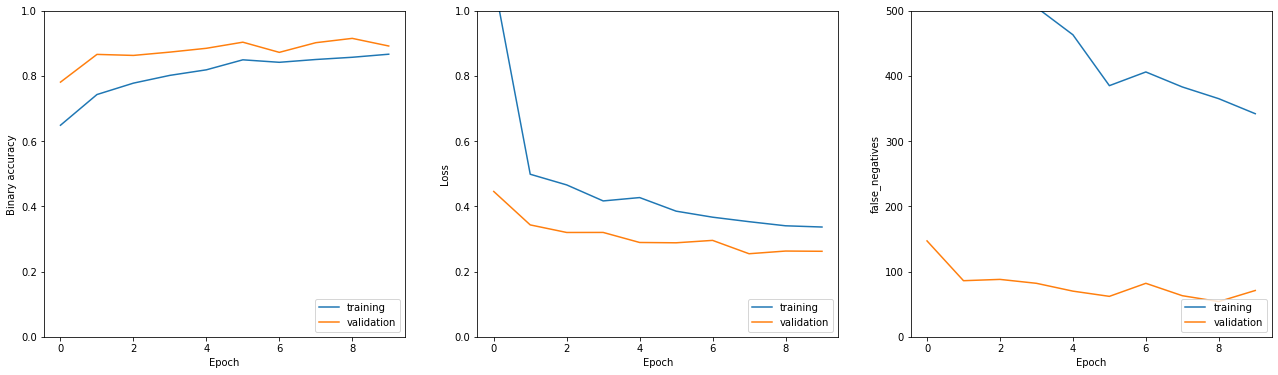

In [48]:
from matplotlib import pyplot as plt
import tensorflow

def plot_history(history : tensorflow.keras.callbacks.History):
    """ This helper function takes the tensorflow.python.keras.callbacks.History
    that is output from your `fit` method to plot the loss and accuracy of
    the training and validation set.
    """
    fig, axs = plt.subplots(1,3, figsize=(22,6))
    axs[0].plot(history.history['binary_accuracy'], label='training')
    axs[0].plot(history.history['val_binary_accuracy'], label='validation')
    axs[0].set(xlabel = 'Epoch', ylabel='Binary accuracy', ylim=[0, 1])
    axs[0].legend(loc='lower right')

    axs[1].plot(history.history['loss'], label='training')
    axs[1].plot(history.history['val_loss'], label = 'validation')
    axs[1].set(xlabel = 'Epoch', ylabel='Loss', ylim=[0, 1])
    axs[1].legend(loc='lower right')

    axs[2].plot(history.history['false_negatives_3'], label = 'training')
    axs[2].plot(history.history['val_false_negatives_3'], label = 'validation')
    axs[2].set(xlabel = 'Epoch', ylabel='false_negatives', ylim=[0, 500])
    axs[2].legend(loc='lower right')


    
plot_history(history)

INFO:tensorflow:Assets written to: ../pybin/models/activemodel\assets


INFO:tensorflow:Assets written to: ../pybin/models/activemodel\assets


1/1 [==============================] - 0s 49ms/step
[[9.9938715e-01 3.6940238e-04]]
CRACK


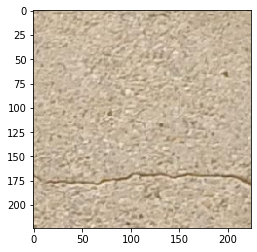

In [60]:


new_model.save('../pybin/models/activemodel')
# Load your image. Make sure it is loaded in with the right dimensions for your model!
image_size = (224, 224)
original_image = image.load_img("C:/Users/bmadmin/Desktop/Octocat/mohammedbouazzaoui/concrete_inspection/project/data/CCCC.jpg", target_size=image_size)


# Convert your image pixels to a numpy array of values .
image_array = image.img_to_array(original_image)

# Reshape your image dimensions so that the colour channels correspond to what your model expects.
image_array = image_array.reshape((1, image_array.shape[0], image_array.shape[1], image_array.shape[2]))

# Preprocess your image with preprocess_input.
prepared_image = preprocess_input(image_array)

# Predict the class of your picture.
prediction = new_model.predict(prepared_image)

# Print out your result.
print(prediction)
if prediction[0][0] > prediction[0][1]:
    print("CRACK")
else:
    print("NOCRACK")
# Show handsome rick.
plt.imshow(original_image)
#plt.show()